In [1]:
import numpy as np
from matplotlib import pyplot as plt


I am implementing value iteration and policy iteration algorithms as given in Chapter 4 of **'Reinforcement Learning: An Introduction' by Sutton and Barto.**
(Figure 4.3:Policy Iteration and Figure 4.5:Value Iteration)

In [2]:
##Initializing the states

grid_type = ['Normal', 'GreyIn', 'BrownIn', 'Goal']
##              0         1         2          3

Grid = np.zeros([10,10], dtype='uint8')
Grid[0][0] = 1
Grid[7][9] = 2
Grid[9][9] = 3 #Goal 1


print(np.flip(Grid.T, axis=0))
print(Grid[9, 9])

[[0 0 0 0 0 0 0 2 0 3]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
3


In [3]:
## Implementing probablity function
## a is a string in 'up', 'down', 'left', 'right'

actions = ['up', 'down', 'left', 'right']

def p (s, a, sf):
  if grid_type[Grid[s[0]][s[1]]] == 'GreyIn':
    if sf[0] == 2 and sf[1] >= 3 and sf[1] <=7:
      return 1/4
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'BrownIn':
    if sf == [7, 1]:
      return 1
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'Goal':
    if sf == s:
      return 1
    else:
      return 0
  c = {}
  if (s[1] < 9):
    c['up'] = [s[0], s[1] + 1]
  else:
    c['up'] = [s[0], s[1]]
  if (s[1] > 0):
    c['down'] = [s[0], s[1]-1]
  else:
    c['down'] = [s[0], s[1]]
  if (s[0] < 9):
    c['right'] = [s[0]+1, s[1]]
  else:
    c['right'] = [s[0], s[1]]
  if (s[0] > 0):
    c['left'] = [s[0]-1, s[1]]
  else:
    c['left'] = [s[0], s[1]]

  p = 0
  for key, value in c.items():
    if sf == value and key == a:
      p += 0.8
    elif sf == value:
      p += 0.2/3
  
  return p  




In [4]:
## Sanity check for probability function

print (p ([0, 9], 'down', [0, 9]))


0.13333333333333333


I am modelling the problem as an infinite horizon problem such that the Goal state only has a transition to itself with probability 1.

Reaching the Goal state from any other state entails an Reward of +10 but reaching Goal from itself (after termination) would not not entail any rewards. (Although it wouldn't affect the policies since it would just mean scaling reward by 1/(1-alpha).

In [5]:


## Reward Function
def r (s, sf):
  if s != sf and grid_type[Grid[sf[0]][sf[1]]] == 'Goal':
    return 10
  else:
    return 0

## Sanity check for reward function
print(r([9,9],[9,9]))
print (r([3,4], [9,9]))

0
10


In [6]:
## Choose 3 random states for question 2b. 
random_states = {}
random_states[(5, 5)] = []
random_states[(7, 2)] = []
random_states[(2, 8)] = []
random_states[(9, 9)] = []
random_states[(1, 8)] = []
# random_states[(1, 4)] = []
# random_states[(3, 6)] = []
# random_states[(3, 0)] = []


random_statesPI = {}
random_statesPI[(5, 5)] = []
random_statesPI[(7, 2)] = []
random_statesPI[(2, 8)] = []
random_statesPI[(9, 9)] = []
random_statesPI[(1, 8)] = []
# random_statesPI[(1, 4)] = []
# random_statesPI[(3, 6)] = []
# random_statesPI[(3, 0)] = []


## Initializing policy with all 'up'.
piVI = {}
for i in range(10):
  for j in range(10):
    piVI[(i,j)] = 'up'


In the following cell, I am going to implement value iteration. I am implementing the **Gauss-Seidel method (Asynchronous value iteration)** since it is more natural to implement when we are not doing any parallel processing.

In [7]:
## Value Iteration. I am using loops instead of matrices.

## Initializing v with zeros. 
v = np.zeros([10, 10])

alpha = 0.7

delta_history = []

# for l in range(5):  ###This for loop is there for 2(c)
while (True):
  delta = 0
  #Per state iteration
  for i in range(0, 10):
    for j in range(0, 10):
      prev_v = v[i, j]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v[k, l])
          
    
        if (val > max_val):
          max_val = val
          piVI[(i, j)] = a
          # print(a)

      
      v[i, j] = max_val
      if (i, j) in random_states.keys():
        random_states[(i, j)].append(max_val)


      delta = max(delta, abs(prev_v - max_val))
  
  print (delta)
  delta_history.append(delta)
  ## Obtaining pi* from the obtained v (or J).
  if (delta == 0):
    piStrVI = piVI
    break
      
        
piStrVI = piVI

8.0
4.853333333333333
2.926933333333333
1.765916444444444
1.070867342222222
0.6491495841185182
0.39379361731318496
0.2388681452971297
0.1449117867395248
0.0879705705609641
0.05482936534962274
0.03642764946382892
0.0236285572777395
0.01493661253618141
0.00780016470817179
0.00510280851694718
0.002182495993521282
0.0007730422067205069
0.0002448577679672881
7.203841153501783e-05
2.49705773498754e-05
1.110941755294581e-05
4.387612271977703e-06
2.3430356678663666e-06
1.389681794354558e-06
7.067675901473169e-07
3.156586339259082e-07
1.2719910419400904e-07
4.7252194323998964e-08
1.6452305781622378e-08
5.50327235171455e-09
1.8703301615796697e-09
7.037204985405054e-10
3.0654006416552804e-10
1.4682297044821269e-10
7.114141914454919e-11
3.313654212133699e-11
1.456903347962779e-11
6.035782984525895e-12
2.3700139073490334e-12
8.929731953877251e-13
3.298403217222301e-13
1.2322781683948847e-13
4.8079595860173185e-14
1.9935442185925467e-14
8.666678485980128e-15
3.837208328860697e-15
1.6930901125533637e

In [8]:
print(v)

[[0.11385513 0.07133478 0.04485159 0.02940137 0.03142065 0.04716929
  0.07171188 0.10347506 0.12557793 0.10196562]
 [0.07133489 0.04615459 0.03083511 0.03098819 0.0464461  0.07163796
  0.10952725 0.15971315 0.19666142 0.15462236]
 [0.04485385 0.03083825 0.0310576  0.04644293 0.0717689  0.11099637
  0.17032912 0.2510634  0.31452166 0.23834058]
 [0.0294431  0.03105306 0.04645031 0.07178258 0.1111683  0.17206314
  0.26486022 0.39461385 0.5044737  0.36665112]
 [0.03218125 0.04655758 0.07178921 0.11117805 0.1722136  0.2666702
  0.41154751 0.61963447 0.81119701 0.5622787 ]
 [0.04845136 0.07188658 0.11117953 0.17221678 0.2667729  0.41321143
  0.63897585 0.97171027 1.30803385 0.85905854]
 [0.07381036 0.11118651 0.17214122 0.26672727 0.41324336 0.64017598
  0.99132254 1.52130989 2.11561091 1.29065379]
 [0.11235019 0.17117662 0.26564707 0.41230604 0.63960307 0.99168994
  1.53684702 2.37673783 3.4345435  0.11982363]
 [0.16722417 0.2567688  0.40144695 0.62751816 0.97995139 1.52855546
  2.38105715 

In [9]:
print (piStrVI)

{(0, 0): 'up', (0, 1): 'down', (0, 2): 'down', (0, 3): 'down', (0, 4): 'up', (0, 5): 'up', (0, 6): 'right', (0, 7): 'right', (0, 8): 'right', (0, 9): 'right', (1, 0): 'left', (1, 1): 'down', (1, 2): 'down', (1, 3): 'up', (1, 4): 'right', (1, 5): 'right', (1, 6): 'right', (1, 7): 'right', (1, 8): 'right', (1, 9): 'right', (2, 0): 'left', (2, 1): 'left', (2, 2): 'right', (2, 3): 'right', (2, 4): 'right', (2, 5): 'right', (2, 6): 'right', (2, 7): 'right', (2, 8): 'right', (2, 9): 'right', (3, 0): 'left', (3, 1): 'right', (3, 2): 'right', (3, 3): 'right', (3, 4): 'right', (3, 5): 'right', (3, 6): 'right', (3, 7): 'right', (3, 8): 'right', (3, 9): 'right', (4, 0): 'right', (4, 1): 'right', (4, 2): 'right', (4, 3): 'right', (4, 4): 'right', (4, 5): 'right', (4, 6): 'right', (4, 7): 'right', (4, 8): 'right', (4, 9): 'right', (5, 0): 'right', (5, 1): 'right', (5, 2): 'up', (5, 3): 'up', (5, 4): 'right', (5, 5): 'right', (5, 6): 'right', (5, 7): 'right', (5, 8): 'right', (5, 9): 'down', (6, 0):

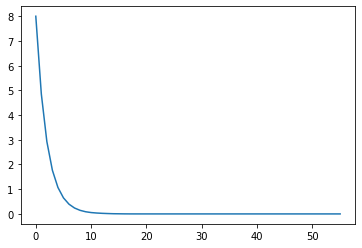

/media/ravi/Projects/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


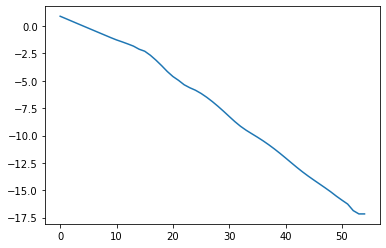

In [10]:
## Plot |J_i+1 - J_i|  vs iterations 
plt.plot (delta_history)
plt.show()

## Ploting the same on exponential scale.
plt.plot (np.log10(delta_history))
plt.show()



We can clearly see that the delta converges to 0 exponentially.

In [11]:
## Initializing policy with all 'up'.
piPI = {}
for i in range(10):
  for j in range(10):
    piPI[(i,j)] = 'up'

## Maintaing pi_i+1 != pi_i history vector
diff_history = []

## Initializing v_PI (J) with all zeros.
v_PI = np.zeros([10, 10])

This cell will implement policy iteration. The policy evaluation is done using an asynchronous value iteration like scheme.

In [12]:
## Policy iteration


# for l in range(4): ### This for loop is there for 2(d)
while(True):
  ## Policy Evaluation
  while (True):
    delta = 0
    #Per state iteration
    for i in range(0, 10):
      for j in range(0, 10):
        prev_v = v_PI[i, j]
        a = piPI [(i, j)]
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        v_PI[i, j] = val
        delta = max(delta, abs(prev_v - val))
    
    #Ending Policy Evaluation Step  once J is found.
    if (delta < 1e-13):
      break


  ## Policy improvement
    
  diff = 0
  for i in range(0, 10):
    for j in range(0, 10):
      prev_action = piPI[(i,j)]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        if (val > max_val):
          max_val = val
          piPI[(i, j)] = a
      if (i, j) in random_statesPI.keys():
        random_statesPI[(i, j)].append(max_val)

         
    
      if (piPI[(i, j)] != prev_action):
        diff += 1
  diff_history.append(diff)
  print (diff)
  if (diff == 0):
    piStrPI = piPI
    break    


      
piStrPI = piPI



88
57
39
16
9
0


 As we can see that both policy iteration and value iteration give similar J* as should be expected. The are exactly the same because in both the cases I am terminating value iteration only when the delta is exactly zero.

In [13]:

print(v_PI - v)

[[-6.02295991e-15 -5.42621503e-15 -5.66213743e-15 -8.43075609e-15
  -1.75276460e-14 -7.93115573e-15 -3.66373598e-15 -4.42701431e-15
  -6.63358257e-15 -6.36990460e-15]
 [-5.39845946e-15 -4.89192020e-15 -6.22071838e-15 -1.16538723e-14
  -5.75928194e-15 -2.66453526e-15 -2.08166817e-15 -3.19189120e-15
  -4.69069228e-15 -4.35762537e-15]
 [-5.48866508e-15 -6.15826834e-15 -1.08628384e-14 -5.37070388e-15
  -2.38697950e-15 -1.40165657e-15 -1.41553436e-15 -2.10942375e-15
  -2.99760217e-15 -2.69229083e-15]
 [-7.65359998e-15 -1.13728471e-14 -5.37070388e-15 -2.34534614e-15
  -1.27675648e-15 -9.71445147e-16 -8.88178420e-16 -1.16573418e-15
  -1.55431223e-15 -1.33226763e-15]
 [-1.44328993e-14 -5.66213743e-15 -2.35922393e-15 -1.29063427e-15
  -9.15933995e-16 -6.66133815e-16 -6.10622664e-16 -5.55111512e-16
  -5.55111512e-16 -5.55111512e-16]
 [-6.41847686e-15 -2.45636844e-15 -1.29063427e-15 -8.88178420e-16
  -7.21644966e-16 -3.88578059e-16 -2.22044605e-16 -2.22044605e-16
  -4.44089210e-16 -5.55111512e-16

In [14]:
print (piPI)

{(0, 0): 'up', (0, 1): 'down', (0, 2): 'down', (0, 3): 'down', (0, 4): 'up', (0, 5): 'up', (0, 6): 'right', (0, 7): 'right', (0, 8): 'right', (0, 9): 'right', (1, 0): 'left', (1, 1): 'down', (1, 2): 'down', (1, 3): 'up', (1, 4): 'right', (1, 5): 'right', (1, 6): 'right', (1, 7): 'right', (1, 8): 'right', (1, 9): 'right', (2, 0): 'left', (2, 1): 'left', (2, 2): 'right', (2, 3): 'right', (2, 4): 'right', (2, 5): 'right', (2, 6): 'right', (2, 7): 'right', (2, 8): 'right', (2, 9): 'right', (3, 0): 'left', (3, 1): 'right', (3, 2): 'right', (3, 3): 'right', (3, 4): 'right', (3, 5): 'right', (3, 6): 'right', (3, 7): 'right', (3, 8): 'right', (3, 9): 'right', (4, 0): 'right', (4, 1): 'right', (4, 2): 'right', (4, 3): 'right', (4, 4): 'right', (4, 5): 'right', (4, 6): 'right', (4, 7): 'right', (4, 8): 'right', (4, 9): 'right', (5, 0): 'right', (5, 1): 'right', (5, 2): 'up', (5, 3): 'up', (5, 4): 'right', (5, 5): 'right', (5, 6): 'right', (5, 7): 'right', (5, 8): 'right', (5, 9): 'down', (6, 0):

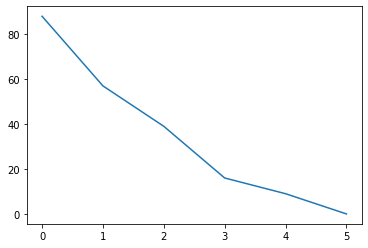

In [15]:
## Policy iteration converges in 6 steps hence we don't have a sufficiently good curve. But we should have expected an exponential curve.
plt.plot(diff_history, label='Policy Iteration')

plt.show()


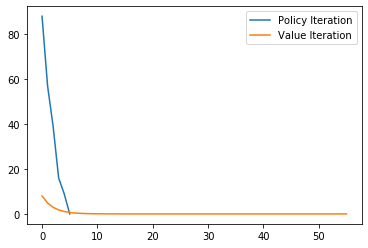

In [16]:
## Simultaneous plots after scaling down to similar scales

plt.plot(diff_history, label='Policy Iteration')
plt.plot(delta_history, label='Value Iteration')
plt.legend()
plt.show()


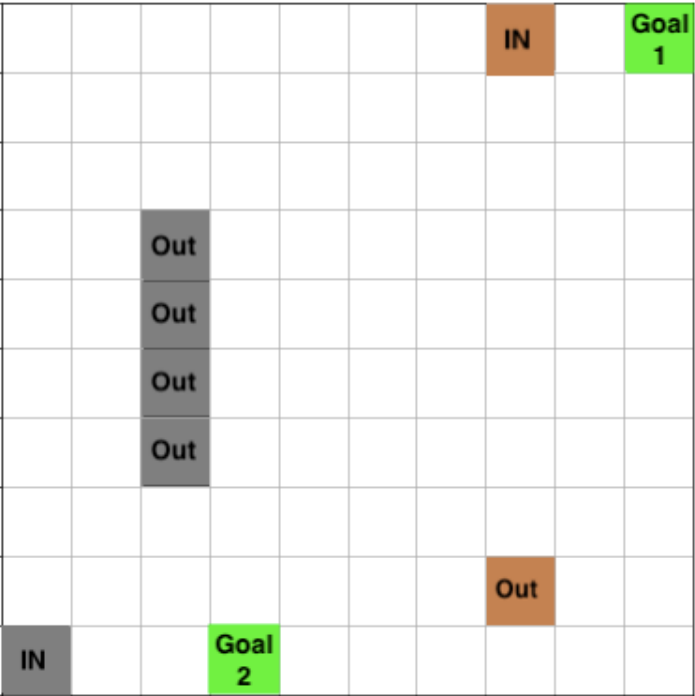

In [17]:
!ls -a
# !conda install -c conda-forge opencv
import cv2
grIm = cv2.imread('grid.png')

 .		      J_PI.png	      q5_goal1.ipynb
 ..		      J_VI.png	      q5_goal2.ipynb
 ans.png	      pi_PI.png      'RL_assignment_q5 - Google Docs.pdf'
 grid.png	      pi_VI.png       submission
 .ipynb_checkpoints   q5_goal1.html   submission.zip


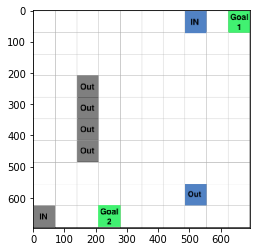

In [18]:
plt.imshow(grIm)
plt.show()

In [19]:
[w, h, channels] = (np.shape(grIm))

In [20]:
def draw_arrow(dirc, im, cellt):
    cell = [cellt[0], 9 - cellt[1]]
    
    if dirc == 'down':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)
    if dirc == 'up':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)
    if dirc == 'right':
        start_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)
    if dirc == 'left':
        start_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)
    
    
    color = (255, 0, 0)  
  
  
    thickness = 4
    return cv2.arrowedLine(im, start_point, end_point, color, thickness, tipLength = 0.5)  

In [21]:
# ar = draw_arrow('right', grIm, (3, 7))
# plt.imshow(ar, aspect = 1)
# plt.show()

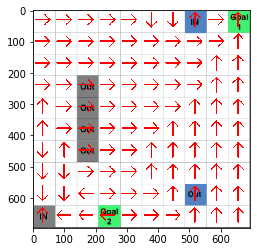

In [22]:
# Policy for value iteration

grIm = cv2.imread('grid.png')
for key, val in piStrVI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_VI.png', grIm)

plt.show()

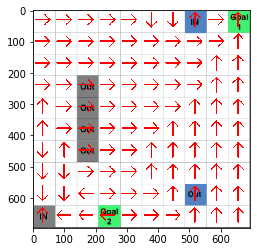

In [23]:
# Policy for policy iteration

grIm = cv2.imread('grid.png')
for key, val in piStrPI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_PI.png', grIm)

plt.show()

In [24]:
print (piStrPI == piStrVI)

True


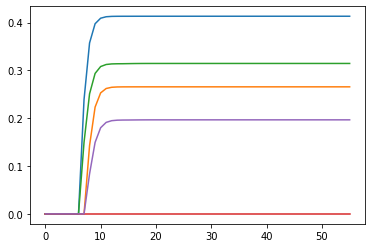

In [25]:
# Value 
for key, value in random_states.items():
    plt.plot(value)
# plt.show()





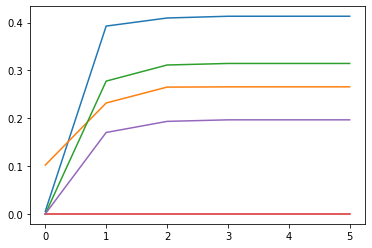

In [26]:
#Policy

for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

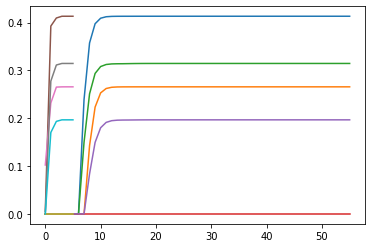

In [27]:
# Both
for key, value in random_states.items():
    plt.plot(value)
# plt.show()



for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

In [28]:
# Function to inscribe J on the image.
def plot_J(im, J):
    for i in range(10):
        for j in range(10):
            a = i
            b = 9 - j
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(im,str(round(J[i][j], 1)),(a*w//10 + 7 , b*h//10 + 50 ), font, 1,(0,0,255),2,cv2.LINE_AA)

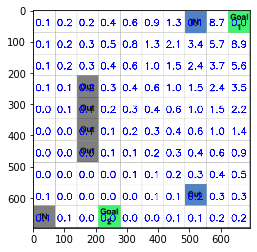

In [29]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v)
cv2.imwrite('J_VI.png', grIm)
plt.imshow(grIm)
plt.show()

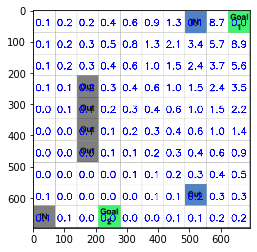

In [30]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v_PI)
cv2.imwrite('J_PI.png', grIm)
plt.imshow(grIm)
plt.show()